In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import cv2

In [3]:
train_path='C:/Users/91741/OneDrive/Documents/Brain_tumor/Training'
test_path='C:/Users/91741/OneDrive/Documents/Brain_tumor\Testing'

In [4]:
import pathlib
train_path=pathlib.Path(train_path)
test_path=pathlib.Path(test_path)

In [5]:
train_path

WindowsPath('C:/Users/91741/OneDrive/Documents/Brain_tumor/Training')

In [6]:
image_count_train=len(list(train_path.glob('*/*.jpg')))
image_count_test=len(list(test_path.glob('*/*.jpg')))

In [7]:
image_count_train,image_count_test

(5712, 1262)

In [8]:
tumor_img_train = {
    'glioma': list(train_path.glob('glioma/*')),
    'meningioma': list(train_path.glob('meningioma/*')),
    'notumor': list(train_path.glob('notumor/*')),
    'pituitary': list(train_path.glob('pituitary/*'))
}
tumor_img_test = {
    'glioma': list(test_path.glob('glioma/*')),
    'meningioma': list(test_path.glob('meningioma/*')),
    'notumor': list(test_path.glob('notumor/*')),
    'pituitary': list(test_path.glob('pituitary/*'))
}

tumor_labels = {
    'glioma':0,
    'meningioma': 1,
    'notumor': 2,
    'pituitary': 3
}

In [9]:
for keys,values in tumor_img_train.items():
  print(f'{keys}:{len(values)}')

glioma:1321
meningioma:1339
notumor:1595
pituitary:1457


In [10]:
for keys,values in tumor_img_test.items():
  print(f'{keys}:{len(values)}')

glioma:251
meningioma:306
notumor:405
pituitary:300


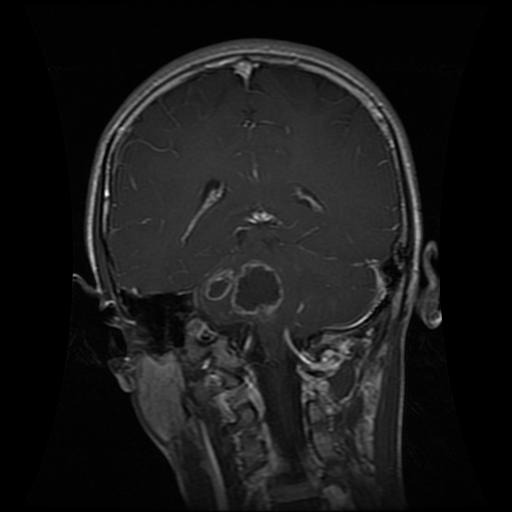

In [11]:
import PIL
PIL.Image.open(str(tumor_img_train['glioma'][3]))

In [12]:
xtrain,ytrain=[],[]
for image_name,images in tumor_img_train.items():
  for image in images:
    img=cv2.imread(str(image))
    resize_img=cv2.resize(img,(180,180))
    xtrain.append(resize_img)
    ytrain.append(tumor_labels[image_name])
xtest,ytest=[],[]
for image_name,images in tumor_img_test.items():
  for image in images:
    img=cv2.imread(str(image))
    resize_img=cv2.resize(img,(180,180))
    xtest.append(resize_img)
    ytest.append(tumor_labels[image_name])

In [13]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)
ytest=np.array(ytest)

In [14]:
xtrain.shape,xtest.shape

((5712, 180, 180, 3), (1262, 180, 180, 3))

In [15]:
xtrain=xtrain/255
xtest=xtest/255

In [16]:
num_classes = 4
model = keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [18]:
history=model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
179/179 [==============================] - 77s 431ms/step - loss: 0.4517 - accuracy: 0.8249
Epoch 2/10
179/179 [==============================] - 81s 450ms/step - loss: 0.2230 - accuracy: 0.9193
Epoch 3/10
179/179 [==============================] - 81s 450ms/step - loss: 0.1258 - accuracy: 0.9548
Epoch 4/10
179/179 [==============================] - 83s 462ms/step - loss: 0.0671 - accuracy: 0.9769
Epoch 5/10
179/179 [==============================] - 84s 469ms/step - loss: 0.0396 - accuracy: 0.9876
Epoch 6/10
179/179 [==============================] - 81s 451ms/step - loss: 0.0217 - accuracy: 0.9937
Epoch 7/10
179/179 [==============================] - 79s 443ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 8/10
179/179 [==============================] - 72s 405ms/step - loss: 0.0233 - accuracy: 0.9914
Epoch 9/10
179/179 [==============================] - 76s 422ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 10/10
179/179 [==============================] - 79s 439ms/step - l

In [19]:
model.evaluate(xtest,ytest)

40/40 [==============================] - 5s 103ms/step - loss: 0.1192 - accuracy: 0.9691


[0.11918574571609497, 0.9690966606140137]

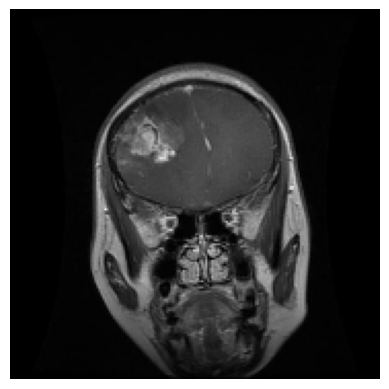

In [20]:
plt.axis('off')
plt.imshow(xtrain[0])
plt.show()

In [21]:
ypred=model.predict(xtest)
ypred[:3]

40/40 [==============================] - 4s 91ms/step


array([[11.132729  , -2.90455   , -4.3645663 , -2.3786602 ],
       [ 9.06692   ,  3.4513547 , -5.239982  , -1.2057842 ],
       [12.4174385 ,  0.80133975, -2.1650088 , -6.184027  ]],
      dtype=float32)

In [22]:
yclass=[np.argmax(element) for element in ypred]
yclass[670]

2

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yclass))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       251
           1       0.96      0.92      0.94       306
           2       0.99      1.00      1.00       405
           3       0.97      0.99      0.98       300

    accuracy                           0.97      1262
   macro avg       0.97      0.97      0.97      1262
weighted avg       0.97      0.97      0.97      1262



In [24]:
import pandas as pd
pd.crosstab(ytest,yclass)

col_0,0,1,2,3
row_0,,,,
0,240,11,0,0
1,13,280,3,10
2,0,0,405,0
3,1,1,0,298


<function matplotlib.pyplot.show(close=None, block=None)>

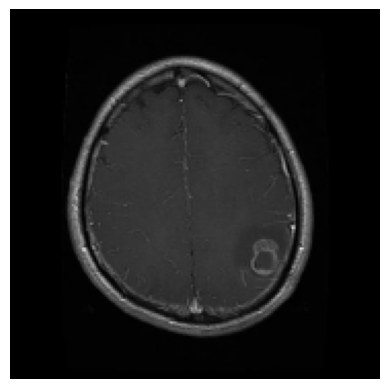

In [25]:
plt.axis('off')
plt.imshow(xtest[6])
plt.show

In [26]:
classes=["glioma","meningioma","notumor","pituitary"]

In [27]:
classes[ytest[6]],classes[yclass[6]]

('glioma', 'glioma')

In [28]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 179}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

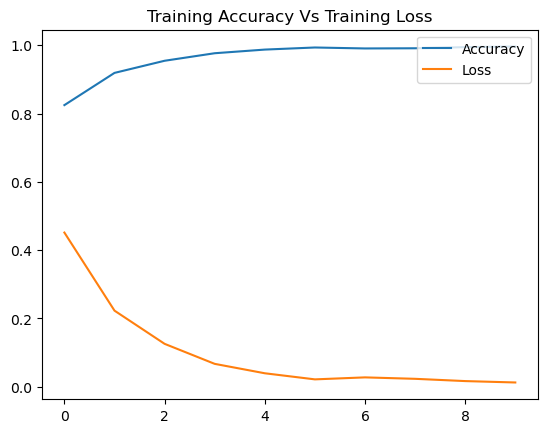

In [31]:
accuracy = history.history['accuracy']
loss = history.history['loss']
plt.plot(range(10),accuracy, label='Accuracy')
plt.plot(range(10),loss, label='Loss')
plt.legend(loc='upper right')
plt.title('Training Accuracy Vs Training Loss')
plt.show()

In [33]:
model.save("modelbrain.h5")